In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

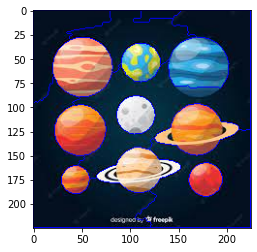

In [48]:
img = cv2.imread('../data/planets.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Remove noise.
kernal = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernal, iterations=2)

# Find the sure background region.
sure_bg = cv2.dilate(opening, kernal, iterations=3)

# Find the sure foreground region.
ditst_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(ditst_transform, 0.7*ditst_transform.max(), 255, 0)
sure_fg = sure_fg.astype(np.uint8)

# Find the unknown region.
unknown = cv2.subtract(sure_bg, sure_fg)

# Label the foreground objects.
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1.
markers += 1

# Label the unknown region as 0.
markers[unknown==255] = 0

markers = cv2.watershed(img, markers)
img[markers==-1] = [255,0,0]

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [50]:
cv2.imshow('thresh', cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# cv2.imshow('opening', opening)
# cv2.imshow('sure_bg', sure_bg)
# cv2.imshow('dist_transform', unknown)
cv2.waitKey()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x55becdb281b0) is not the object's thread (0x55becd99fa80).
Cannot move to target thread (0x55becdb281b0)

QObject::moveToThread: Current thread (0x55becdb281b0) is not the object's thread (0x55becd99fa80).
Cannot move to target thread (0x55becdb281b0)

QObject::moveToThread: Current thread (0x55becdb281b0) is not the object's thread (0x55becd99fa80).
Cannot move to target thread (0x55becdb281b0)

QObject::moveToThread: Current thread (0x55becdb281b0) is not the object's thread (0x55becd99fa80).
Cannot move to target thread (0x55becdb281b0)

QObject::moveToThread: Current thread (0x55becdb281b0) is not the object's thread (0x55becd99fa80).
Cannot move to target thread (0x55becdb281b0)

QObject::moveToThread: Current thread (0x55becdb281b0) is not the object's thread (0x55becd99fa80).
Cannot move to target thread (0x55becdb281b0)

QObject::moveToThread: Current thread (0x55becdb281b0) is not the object's thread (0x55becd99fa80).
Cannot move to tar